In [203]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict, cross_val_score

import scipy.stats as stats
import seaborn as sns

from sklearn.linear_model import LogisticRegression
import sklearn.tree as DecisionTree

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


In [204]:
df = pd.read_csv('DATA/train.csv', usecols=['Age', 'Fare', 'Survived'])


In [205]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [206]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

C:\Users\BIT\AppData\Local\Temp\ipykernel_26580\1698716155.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [207]:
df.head(2)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833


In [208]:
x = df.iloc[:,1:3]
y = df.iloc[:,0]

In [209]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

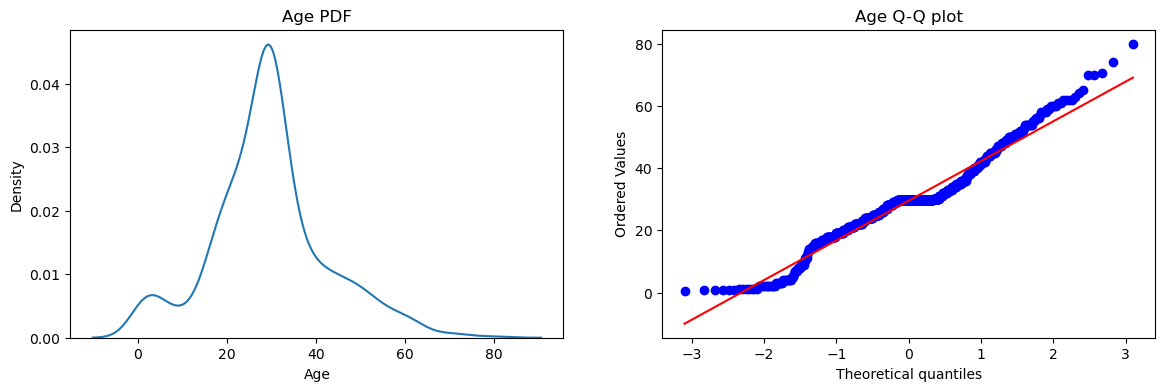

In [210]:
#before transformation 
import matplotlib.pyplot as plt
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(x=x_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Age'], dist="norm", plot=plt)
plt.title('Age Q-Q plot')
plt.show()

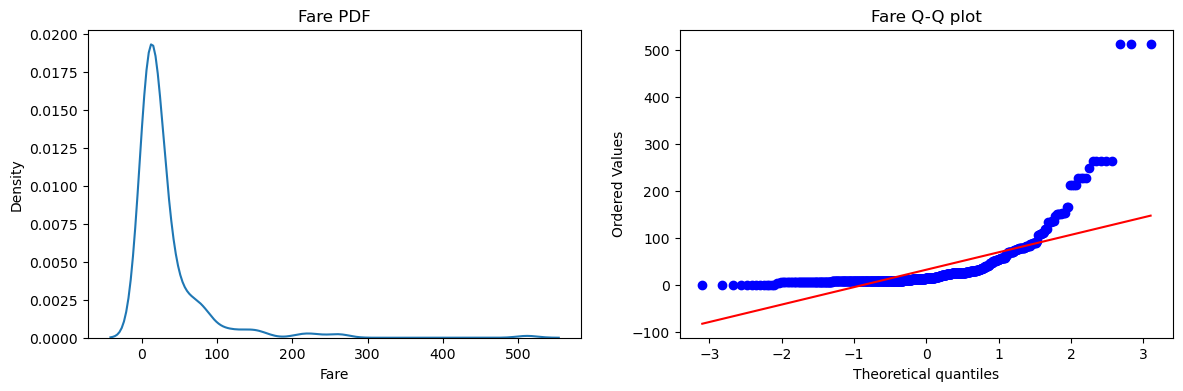

In [211]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(x=x_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(x_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Q-Q plot')
plt.show()

In [212]:
clf = LogisticRegression()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)  

clf2 = DecisionTree.DecisionTreeClassifier()
clf2.fit(x_train, y_train)
y_pred2 = clf2.predict(x_test)
accuracy_score(y_test, y_pred2)

print("Accurancy LR", accuracy_score(y_test, y_pred))
print("Accurancy DT", accuracy_score(y_test, y_pred2))

Accurancy LR 0.6480446927374302
Accurancy DT 0.6480446927374302


with log transformation

In [213]:
trf = FunctionTransformer(func = np.log1p)

In [214]:
x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.transform(x_test)

In [215]:
clf = LogisticRegression()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

clf2 = DecisionTree.DecisionTreeClassifier()
clf2.fit(x_train_transformed, y_train)
y_pred2 = clf2.predict(x_test_transformed)
accuracy_score(y_test, y_pred2)

print("Accurancy LR after transformation", accuracy_score(y_test, y_pred))
print("Accurancy DT after transformation", accuracy_score(y_test, y_pred2))

Accurancy LR after transformation 0.6480446927374302
Accurancy DT after transformation 0.6703910614525139


In [216]:
x_transformed = trf.fit_transform(x)
clf = LogisticRegression()
clf2 = DecisionTree.DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf, x_transformed, y,scoring ='accuracy', cv=10)))
print("DT",np.mean(cross_val_score(clf2, x_transformed, y,scoring ='accuracy', cv=10)))

LR 0.678027465667915
DT 0.6555056179775283


with x^2 transformation

In [217]:
#we are making a general function for transformation

def apply_transform(transform):
    x = df.iloc[:,1:3]
    y = df.iloc[:,0]

    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    clf = LogisticRegression()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy_score(y_test, y_pred)  

    clf2 = DecisionTree.DecisionTreeClassifier()
    clf2.fit(x_train, y_train)
    y_pred2 = clf2.predict(x_test)
    accuracy_score(y_test, y_pred2)

    print("Accurancy LR before transformation", accuracy_score(y_test, y_pred))
    print("Accurancy DT before transformation", accuracy_score(y_test, y_pred2))
    x_trans = trf.fit_transform(x)
    clf = LogisticRegression()
    clf2 = DecisionTree.DecisionTreeClassifier()

    print("accuracy LR after transformation",np.mean(cross_val_score(clf, x_trans, y,scoring ='accuracy', cv=10)))
    print("accuracy DT after transformation",np.mean(cross_val_score(clf2, x_trans, y,scoring ='accuracy', cv=10)))

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    stats.probplot(x['Fare'], dist="norm", plot=plt)
    plt.title('Fare Q-Q plot before transformation')

    plt.subplot(122)
    stats.probplot(x_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare Q-Q plot after transformation') 

    plt.show()



Accurancy LR before transformation 0.6480446927374302
Accurancy DT before transformation 0.659217877094972
accuracy LR after transformation 0.6712609238451936
accuracy DT after transformation 0.6532334581772783


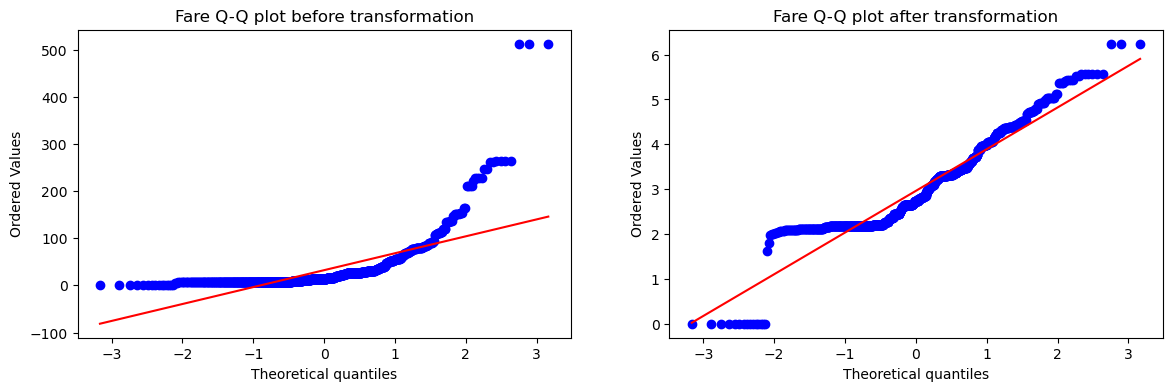

In [218]:
apply_transform(np.log1p)

Accurancy LR before transformation 0.6480446927374302
Accurancy DT before transformation 0.6815642458100558
accuracy LR after transformation 0.6431335830212235
accuracy DT after transformation 0.6543695380774033


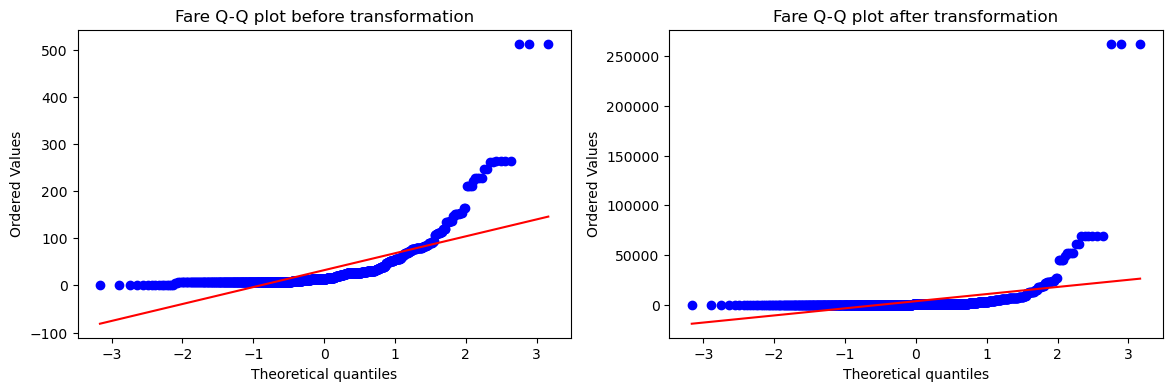

In [219]:
apply_transform(lambda x : x**2) 

Accurancy LR before transformation 0.6480446927374302
Accurancy DT before transformation 0.6703910614525139
accuracy LR after transformation 0.61729088639201
accuracy DT after transformation 0.6554556803995005


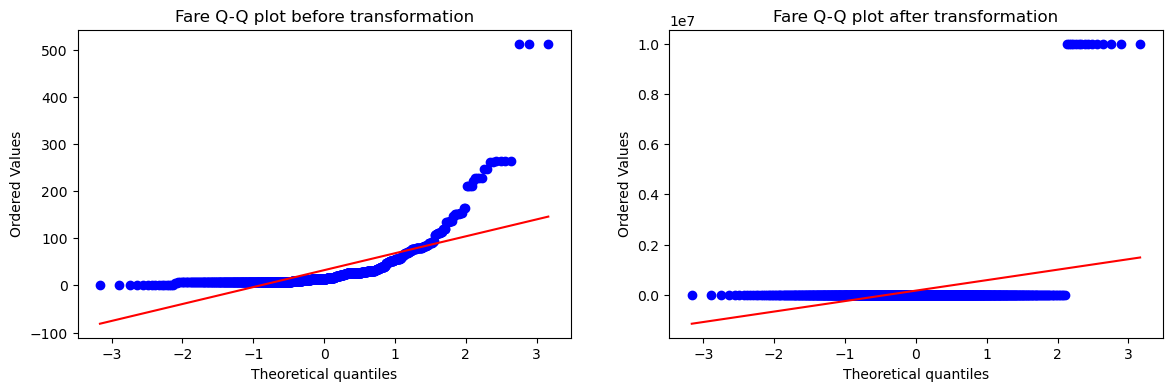

In [220]:
apply_transform(lambda x : 1/(x+0.0000001))

Accurancy LR before transformation 0.6480446927374302
Accurancy DT before transformation 0.664804469273743
accuracy LR after transformation 0.6195131086142323
accuracy DT after transformation 0.6094257178526842


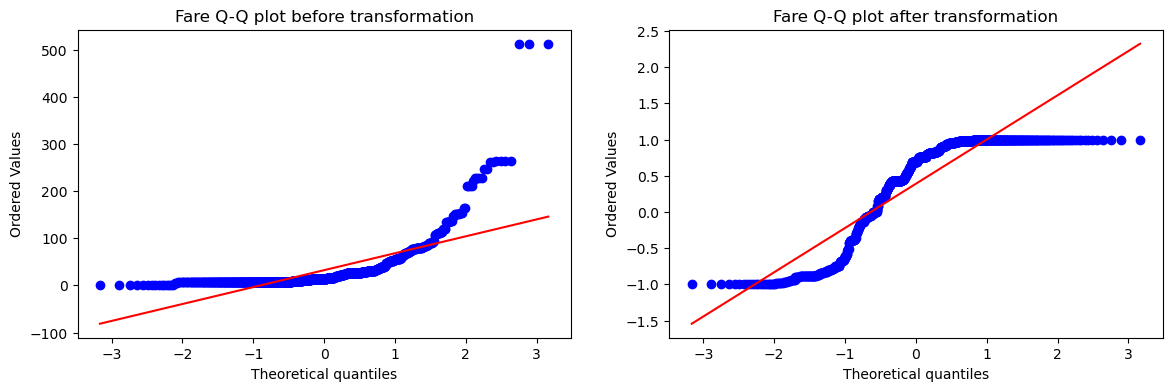

In [221]:
apply_transform(np.sin)